# Vetores

Vetores em Julia são representados por objetos Array unidimensionais. Um vetor é construído fornecendo a lista de elementos entre colchetes, com os elementos separados por vírgulas ou ponto e vírgula. O operador de atribuição  =  é usado para dar um nome ao array.

In [2]:
x = [-1.1, 0.0, 3.9, -7.2, 1000000]

5-element Vector{Float64}:
 -1.1
  0.0
  3.9
 -7.2
  1.0e6

In [3]:
length(x) # A função length retorna o tamanho (dimension) de x.

5

In [4]:
y = [-1.1; 0.0; 3.6; -7.2] # Usando ponto-e-vírgula

4-element Vector{Float64}:
 -1.1
  0.0
  3.6
 -7.2

In [5]:
length(y)

4

**Observação** Não se esqueça das vírgulas ou ponto e vírgula entre as entradas e certifique-se de usar colchetes para definir vetores.

In [6]:
a = [ 1, 2 ] # a é um vetor linha
b = ( 1, 2 ) # b é uma tupla ou lista que consiste em dois escalares

(1, 2)

**Indexação.** Um elemento específico $x_i$ é recuperado pela expressão ```x[i]``` onde ```i``` é o índice (que vai de 1 a $n$, para um $n$-vetor). A indexação de matriz também pode ser usada no lado esquerdo de uma atribuição, para alterar o valor de um elemento específico.

In [7]:
x = [ -3.1, 0.2, 4.6, -49.8, 2023.1 ];
x[1]

-3.1

In [8]:
x[3] = 100.0
x

5-element Vector{Float64}:
   -3.1
    0.2
  100.0
  -49.8
 2023.1

In [101]:
x[end] # O índice especial end refere-se ao último índice do vetor x
x[length(x)] # x[length(x)] fornecem a última entrada de x

3

**IMPORTANTE: Atribuição X Cópia**. Em Julia, se ```x``` for um array a atribuição ```y = x``` dá um novo nome (ou referência) ```y``` ao *mesmo* o array já referenciado por ```x```. Ele não cria uma nova cópia do array ```x```.

In [10]:
x = [ -3.1, 0.2, 4.6, -49.8, 45.1 ];
y = x
x[4] = 10000000.0
y #A atribuição a x[4] também altera y[4]

5-element Vector{Float64}:
 -3.1
  0.2
  4.6
  1.0e7
 45.1

In [11]:
y[1] = 2023.3
x

5-element Vector{Float64}:
 2023.3
    0.2
    4.6
    1.0e7
   45.1

Para criar uma nova cópia de um array, deve-se utilizar a função ```copy```.

In [12]:
x = [ -3.1, 0.2, 4.6, -49.8, 45.1 ];
y = copy(x)
x[3] = 2023.3
y

5-element Vector{Float64}:
  -3.1
   0.2
   4.6
 -49.8
  45.1

In [13]:
y[1] = 2000000.0
x

5-element Vector{Float64}:
   -3.1
    0.2
 2023.3
  -49.8
   45.1

**Igualdade vetorial.** A igualdade de vetores é verificada usando o operador relacional ```==```. Para dois vetores (arrays) ```a``` e ```b```, a expressão  ```a==b``` é avaliada como ```true``` se os vetores (arrays) são iguais, *i.e.*, eles têm o mesmo tamanho e entradas idênticas, e ```false``` caso contrário.

In [14]:
x = [ -3.1, 0.2, 4.6, -49.8, 45.1 ];
y = copy(x)
y[3] = 40004.0
z = copy(x)
z == x

true

In [15]:
z = x
z[3] = 2023.0
z == x

true

**Observação: Escalares X vetores em $\mathbb{R}^1$.** Na notação matemática, um vetor em $\mathbb{R}^1$ igual a um número. Mas em Julia, vetores em $\mathbb{R}^1$ não são o mesmo que escalares (números).

In [16]:
x = [3.14]

1-element Vector{Float64}:
 3.14

In [17]:
y = 3.14

3.14

In [18]:
x == y

false

In [19]:
x[1] == y # Na última linha, x[1] é a primeira (e única) entrada de x, que é de fato o número 3.14.

true

**Vetores de blocos ou empilhados.** 

In [20]:
x = [ 1,-2];
y = [1,1,0.0];
z = [x ; y] # Concatenando usando ponto e vírgula

5-element Vector{Float64}:
  1.0
 -2.0
  1.0
  1.0
  0.0

In [21]:
z = vcat(x,y) # usando vcat (concatenação vertical) 

5-element Vector{Float64}:
  1.0
 -2.0
  1.0
  1.0
  0.0

**Observação:**  ```z = (x,y)``` cria uma lista ou tupla dos dois vetores; ```z = [x,y]``` cria uma matriz dos dois vetores. Ambas são expressões válidas do Julia, mas nenhuma delas é o vetor empilhado ```[x;y]```.

**Subvetores e divisão:** A expressão ```r:s``` denota o intervalo do índice $r, r + 1,...,s$. (onde  ```r``` e ```s``` são inteiros positivos com ```r``` o menor dos dois.) Usamos $x_{r:s} $ para denotar a fatia do vetor x do índice $r$ para $s$.

In [22]:
x = [20, 56, 10, -100, 2023, 200, -1, 33]
y = x[2:5] # Extraimos um subvetor do vetor x usando um intervalo de índices como argumento.

4-element Vector{Int64}:
   56
   10
 -100
 2023

In [23]:
x[6:7] = [10, 100]; # Reatribuimos os valores das entradas 6 e 7 de x 
x

8-element Vector{Int64}:
   20
   56
   10
 -100
 2023
   10
  100
   33

**Indexando em arrays.** Podemos usar um intervalo de números com um terceiro argumento, que dá o passo, que é o incremento entre índices sucessivos. 

**Exemplo:** o intervalo de índices ```1:2:5``` é a lista de números ```1,3,5```. A expressão ```x[1:2:5]``` extrai o vetor em $\mathbb{R}^3$ ```[20, 10, 2023]```, i. e., as entradas $x[1]$, $x[3]$ e $x[5]$ de $x$ definidas acima. 

Também podemos usar um intervalo de índices que é executado para trás. Para qualquer vetor ```z```, a expressão  ```z[end:-1:1]``` é o vetor reverso, ou seja, o vetor com os mesmos coeficientes, mas em ordem oposta.

**Vetor das diferenças:** Construiamos o vetor $d \in \mathbb{R}^{(n-1)}$  definido por $d_i = x_{i+1} - x_i$ para $i = 1,...,n - 1 $, onde $x \in \mathbb{R}^n$. O vetor $d$ é dito de vetor das (primeiras) diferenças de $x$.

In [24]:
x = [10, 100,1000,-1, -34];
d = x[2:end] - x[1:end-1]

4-element Vector{Int64}:
    90
   900
 -1001
   -33

**Lista de vetores.** Uma lista ordenada de vetores em $\mathbb{R}^n$ pode ser denotada como $a_1,...,a_k$ ou $a^{(1)},...,a^{(k)}$ ou apenas como $a,b,c$. 

In [25]:
x = [1.0, 0]; y = [1.0,-1.0]; z = [0,1.0];
lista = [x,y,z]  # formamos uma matriz unidimensional de vetores.

3-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [1.0, -1.0]
 [0.0, 1.0]

In [26]:
lista[2] #Segundo elemento da lista

2-element Vector{Float64}:
  1.0
 -1.0

In [27]:
lista = (x,y,z) # Se usamos parênteses obtemos uma tupla ou lista

([1.0, 0.0], [1.0, -1.0], [0.0, 1.0])

In [28]:
lista[3] # Usamos Para extrair o i-ésimo vetor da lista de vetores, use lista[i].

2-element Vector{Float64}:
 0.0
 1.0

**Observação:** Para extrair o i-ésimo vetor da lista de vetores, use ```lista[i]```. Para obter o $j$-ésimo elemento ou coeficiente do $i$-ésimo vetor na lista, use ```lista[i][j]```.

**Vetores zero**

In [103]:
zeros(3) # a funçao zeros(n) Cria um vetor zero de dimensão $n$

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [107]:
zeros(length(x)) # cria um vetor zero com o mesmo tamanho do vetor x

3-element Vector{Float64}:
 0.0
 0.0
 0.0

**Vetores unitários**. Não há nenhuma função interna de Julia para criar $e_i$, o $i$-ésimo vetor unitário de comprimento $n$. 

In [30]:
# Criamos $e_i$, com $i = 2$ e $n = 4$
i = 2; n = 4;
ei = zeros(n); #Cria um vetor zero
ei[i] = 1; #Defina a entrada i para 1
ei

4-element Vector{Float64}:
 0.0
 1.0
 0.0
 0.0

Outra forma de criar $e_i$ usando concatenação

In [31]:
vetor_unit(i,n) = [zeros(i-1); 1; zeros(n-i)]   # Criamos eᵢ usando concatenação

vetor_unit (generic function with 1 method)

In [32]:
vetor_unit(2,4)

4-element Vector{Float64}:
 0.0
 1.0
 0.0
 0.0

**Vetor de uns.** Um vetor de uns de dimensão $n$, denotado $\textbf1_n$ ou apenas $\textbf1$, é criado usando ```ones(n)```.

In [33]:
ones(3)

3-element Vector{Float64}:
 1.0
 1.0
 1.0

**Vetores aleatórios**

In [109]:
rand(3) # gera um vetor aleatório de comprimento 3 com entradas que estão entre 0 e 1

3-element Vector{Float64}:
 0.29875477703384046
 0.7745782436827712
 0.9819160334367156

In [110]:
randn(3) # gera um vetor aletório de comprimento 3 com entradas que vêm de uma distribuição normal

3-element Vector{Float64}:
  0.8782429259996265
 -0.7711311773490911
  0.2671725907167942

**Plotagem** Existem vários pacotes externos para criar gráficos no Julia. Um desses pacotes é Plots.jl.


In [36]:
using Plots # Importando o pacote para plotar

In [37]:
temps = [33.9, 34.1, 34.1, 33.9, 33.5, 32.8, 31.6, 31.2, 32.4, 32.8, 34.3, 33.5];
meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];

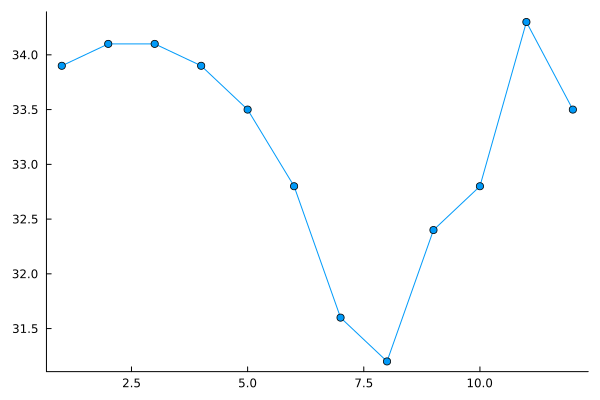

In [38]:
plot(meses,temps, marker = :circle, legend = false, grid = false)
# savefig("exemplo.pdf")

**Figura** Exemplo de plotar 2 vetores

## Adição e substração de vetores

In [39]:
[0, 7, 3] + [1, 2, 0] #Vetor soma

3-element Vector{Int64}:
 1
 9
 3

In [40]:
[1,9] - [1,1] #Vetor subtração

2-element Vector{Int64}:
 0
 8

## Multiplicação escalar-vetor

**Multiplicação e divisão escalar-vetor:** 

In [41]:
x = [0, 2, -1]
2.2*x, x*2.2 #multiplicação escalar-vetor

([0.0, 4.4, -2.2], [0.0, 4.4, -2.2])

In [42]:
x/3, 3\x #Divisão escalar-vetor

([0.0, 0.6666666666666666, -0.3333333333333333], [0.0, 0.6666666666666666, -0.3333333333333333])

**Adição escalar-vetor:**

In [43]:
[1.1, -3.7, 0.3] .- 1.4 #Substração vetor-escalar

3-element Vector{Float64}:
 -0.2999999999999998
 -5.1
 -1.0999999999999999

In [44]:
0.7 .+ [1, -1] # realizando escalar-adição com o escalar à esquerda

2-element Vector{Float64}:
  1.7
 -0.30000000000000004

**Operações elemento a elemento.** também podemos realizar uma operação em cada elemento ou coeficiente de um vetor. Para isso, adicionamos um ponto (```.```) antes do operador. Por exemplo, se x e y são vetores, então ```x.*y, x./y, x.\y, x.^y``` são operações vetor-vetor elemento a elemento. Eles resultam em vetores do mesmo comprimento que $x$ e $y$, onde o  $i$-esimo elemento são $x_i*y_i$, $x_i/y_i$, $y_i/x_i$ e $x_i^{y_i}$, respectivamente.


In [45]:
x = [ 22.15, 89.32, 56.77 ];
y = [ 23.05, 87.32, 57.12 ];
z = (y - x) ./ x

3-element Vector{Float64}:
  0.04063205417607233
 -0.02239140170174653
  0.006165228113440097

**Operações elementares com um escalar:** Se ```a``` é um escalar e ```x``` é um vetor então ```x.^a``` é um vetor com $i$-ésimo elemento ${x_i}^{a}$, e ```a .^x``` é um vetor com elementos $a^{x_i}$.

Também podemos usar a notação de ponto com uma função que tenha um nome, para informar a Julia que a função deve ser aplicada elemento a elemento. Nesse caso, adicionamos o ponto *depois* do nome da função para indicar que ela deve ser aplicada elemento a elemento. 

**Exemplo:** Se ```x``` é um vetor, podemos formar ```sin.(x)``` para aplicar a função $seno$ a cada elemento de ```x```.

In [112]:
x
sin.(x)

3-element Vector{Float64}:
 0.8414709848078965
 0.9092974268256817
 0.1411200080598672

O operador de teste de igualdade ```==``` (e outros operadores relacionais como ```<```,```>=```) pode funcionar elemento a elemento precedendo-o com um ponto: ```x == y``` nos diz se ```x``` e ```y``` são ou não o mesmo vetor; ```x.==y``` é um vetor cujas entradas nos dizem se as entradas correspondentes em ```x``` e ```y``` são iguais.

In [46]:
w = [1,2,2]; z = [1,2,3]
w == z
w .== z

3-element BitVector:
 1
 1
 0

Podemos combinar isso para extrair o subvetor de entradas que satisfaçam alguma condição lógica.

In [47]:
x = [1.1, 5.5, -2.5, -0.3]

4-element Vector{Float64}:
  1.1
  5.5
 -2.5
 -0.3

In [48]:
x[abs.(x) .> 2] # dá o subvetor de ```x``` consistindo em entradas maiores que $2$ em valor absoluto.

2-element Vector{Float64}:
  5.5
 -2.5

A notação de ponto também funciona com atribuição, permitindo atribuir várias entradas de um vetor a um valor escalar.

In [49]:
x = rand(4)

4-element Vector{Float64}:
 0.7188113443266847
 0.660092478430651
 0.31052919959432135
 0.8606859264758223

In [50]:
x[1:2] = [1, -1]
x

4-element Vector{Float64}:
  1.0
 -1.0
  0.31052919959432135
  0.8606859264758223

In [51]:
x[2:3] .= π
x
α=12

12

**Combinação linear:**

In [52]:
a = [1, 2]; b = [ 3, 4]
alpha = -0.5; beta = 1.5;
c = alpha*a + beta*b  # combinação linear

2-element Vector{Float64}:
 4.0
 5.0

A seguinte função usa uma lista de coeficientes e uma lista de vetores como seus argumentos e retorna a combinação linear. As listas podem ser representadas por tuplas ou arrays.

In [113]:
function comblinear(coef,vetores)
    n = length(vetores[1]) # tamanho dos vetores
    a = zeros(n)
    for i = 1:length(vetores)
        a = a + coef[i] * vetores[i];
    end
    return a
end

comblinear (generic function with 1 method)

In [114]:
comblinear((-1.5,2.5), ([2,3], [4,5]))

2-element Vector{Float64}:
 7.0
 8.0

Otra forma de escrever a mesma função é:

In [116]:
function comblinear(coef,vetores)
    return sum(coef[i] * vetores[i] for i = 1:length(vetores))
end
comblinear((-1.5,2.5), ([2,3], [4,5]))

2-element Vector{Float64}:
 7.0
 8.0

**Verificando propriedades.** Vamos verificar a propriedade distributiva

$$\alpha(u+v) = \alpha u+\alpha v, \qquad \forall\alpha \in \mathbb{R},\,\forall u,v \in \mathbb{R}^n$$



In [56]:
u = rand(3)
v = rand(3)
alfa = randn()
u,v,alfa

([0.9573451799936216, 0.3166334925131018, 0.009625271685384962], [0.3990322410227971, 0.0853422385886835, 0.32051681390874665], 1.172062727006392)

In [57]:
esquerda = alfa*(u+v)

3-element Vector{Float64}:
 1.5897594189264008
 0.47114077158554657
 0.3869472331410356

In [58]:
direita = alfa*u + alfa * v

3-element Vector{Float64}:
 1.5897594189264006
 0.47114077158554657
 0.3869472331410355

In [59]:
esquerda == direita

false

Embora os dois vetores esquerda e direita sejam exibidos como iguais, eles podem não ser exatamente iguais, devido a erros de arredondamento muito pequenos em cálculos de ponto flutuante.

# Produto Interno

O produto interno dos vetores $x$ e $y$ é denotado como $x^Ty$. Em Julia, o produto interno de ```x``` e ```y``` é denotado como ```x'*y```.

In [60]:
x = [-1, 2,2];
y = [1, 0, -3];
x'*y

-7

**Exemplo: População total em idade escolar.** Suponha que o vetor ``x`` em $\mathbb{R}^{100}$ forneça a distribuição etária de alguma população, com $x_i$ sendo o número de pessoas com a idade ```i-1```, para $i = 1,\ldots,100$. O número total de pessoas com idade entre $5$ e $18$ anos(inclusive) é dado por $x_6+x_7+...+x_{18}+x_{19}$. Podemos expressar isso como $s^T x$, onde $s$ é o vetor com entradas para ```i = 6,...,19``` e zero caso contrário. Em Julia, isso é expresso como

In [61]:
s = [zeros(5); ones(14); zeros(81)]
x_idades = [rand(5:18) for i = 1:100]
Pop_idade_escolar = s'*x_idades

166.0

Note que, outras expressões podem ser usadas para calcular essa quantidade, por exemplo, a expressão ```sum(x[6:19])```.

In [62]:
sum(x_idades[6:19])

166